Задача определения переменных спроса и представлении функции спроса на товар в виде зависимости от факторов:
Q = f(P, I, A)
где Q - спрос
P - стоимость товара
I - доход потребителей
A - реклама

Для решения поставленной задачи, было принято решение проанализировать площадку Авито среди конкурентов.

*  Для спроса был взят показатель просмотров объявлений
*  P - Стоимость товара - стоимость товара, которую указал продавец в объявлении
*  I - доход потребителей, ср. доход жителей по региону, где размещено объявление
*  A - реклама: кол-во комментариев у продавца (будем считать это рекламой продавца)

In [ ]:
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/ethno_jewelery.csv', index_col = None)

In [ ]:
data.shape

(367, 8)

Данные взяты с сайта Авито по запросу "Этно украшения"

In [ ]:
data.head()

,name,price,url,views_cnt,city,seller,seller_rating,comments_cnt
0,Этно украшения,150.0,https://www.avito.ru/mahachkala/chasy_i_ukrash...,4439,Махачкала,ethno,NaN,217
1,"Этно украшения (кольца, серьги и тд)",550.0,https://www.avito.ru/sibay/chasy_i_ukrasheniya...,28,Сибай,Алия Искужина,NaN,1
2,Этно Бижутерия,250.0,https://www.avito.ru/dagestan_kizlyar/odezhda_...,14,Кизляр,Асият,NaN,0
3,Этно украшения и кольцо с арабской надписью,200.0,https://www.avito.ru/magas/chasy_i_ukrasheniya...,202,Магас,Хава Клематова,NaN,2
4,Этно украшения на голову,50.0,https://www.avito.ru/mahachkala/chasy_i_ukrash...,2725,Махачкала,SAFIYA,NaN,50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           367 non-null    object 
 1   price          367 non-null    float64
 2   url            367 non-null    object 
 3   views_cnt      367 non-null    int64  
 4   city           367 non-null    object 
 5   seller         367 non-null    object 
 6   seller_rating  0 non-null      float64
 7   comments_cnt   367 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 23.1+ KB


Одной из переменных в нашей формуле является ср. доход покупателей. Чтобы получить данный параметр, мы пропишем ср. доход по регионам. Для этого создадим словарь, где ключом будет - город, который указан в объявлении, а значением - ср. доход граждан
Данные по цифрам взяты с ресурса: https://visasam.ru/russia/rabotavrf/zarplata-po-regionam.html

In [ ]:
cities = data.city.unique()
average_income = {}

In [ ]:
for city in cities:
  average_income[city] = 0

In [ ]:
average_income.update(dict.fromkeys(["Махачкала", "Кизляр", "Дербент", 'Левашинский р-н', 'Каспийск', 'Хасавюрт',
                                     'г.о. Хасавюрт','Ахтынский р-н', 'Карабудахкентский р-н', 'Республика Дагестан, Махачкала, пр-т Али-Гаджи Акушинского'], 50845))
average_income.update(dict.fromkeys(['Уфа', 'Сибай', 'Стерлитамак'], 66868))
average_income.update(dict.fromkeys(['Москва'], 156427))
average_income.update(dict.fromkeys(['Клин', 'г.о. Истра', 'Королёв', 'Химки', 'Сергиево-Посадский г.о.', 'Черноголовка', 'Московская обл., Богородский г.о., рп. Обухово, ул. Энтузиастов, 9', 'Богородский г.о., рп. Обухово'], 99934))
average_income.update(dict.fromkeys(["Казань", "Альметьевский р-н"], 73746))
average_income.update(dict.fromkeys(["Санкт-Петербург", "Выборгский р-н", "Всеволожский р-н"], 82430))
average_income.update(dict.fromkeys(["Ижевск"], 67592))
average_income.update(dict.fromkeys(["Псков"], 57125))
average_income.update(dict.fromkeys(["Воронеж"], 63879))
average_income.update(dict.fromkeys(["Петрозаводский г.о."], 80444))
average_income.update(dict.fromkeys(["Смоленск", "Рославльский р-н"], 61617))
average_income.update(dict.fromkeys(["Астрахань", "Астраханская обл., Астрахань, ул. Рылеева, 90"], 64331))
average_income.update(dict.fromkeys(["Бахчисарайский р-н", "Симферополь", "Севастополь"], 58730))
average_income.update(dict.fromkeys(["Нальчик", "Баксан"], 53661))
average_income.update(dict.fromkeys(["Пенза"], 57838))
average_income.update(dict.fromkeys(["Улан-Удэ"], 79954))
average_income.update(dict.fromkeys(["Пермь", "Чайковский г.о."], 74984))
average_income.update(dict.fromkeys(["Екатеринбург"], 80217))
average_income.update(dict.fromkeys(["Боровский р-н", "Сухиничский р-н"], 74431))
average_income.update(dict.fromkeys(["Тамбов"], 56543))
average_income.update(dict.fromkeys(["Волгоград"], 60653))
average_income.update(dict.fromkeys(["Краснодар"], 96026))
average_income.update(dict.fromkeys(["Тюмень"], 86741))
average_income.update(dict.fromkeys(["Иваново"], 52341))
average_income.update(dict.fromkeys(["Челябинск"], 70953))
average_income.update(dict.fromkeys(["Кострома"], 52761))
average_income.update(dict.fromkeys(["Владимир"], 59732))
average_income.update(dict.fromkeys(["Архангельск"], 74121))
average_income.update(dict.fromkeys(["Новомосковск"], 63542))
average_income.update(dict.fromkeys(["Рязань"], 60732))
average_income.update(dict.fromkeys(["Саратов"], 57321))
average_income.update(dict.fromkeys(["Барнаул"], 58341))
average_income.update(dict.fromkeys(["Черкесск"], 52541))
average_income.update(dict.fromkeys(["Самара", "Сызрань"], 70321))
average_income.update(dict.fromkeys(["Оренбург", "Соль-Илецк"], 60452))
average_income.update(dict.fromkeys(["Омск"], 65832))
average_income.update(dict.fromkeys(["Отрадненский р-н"], 58241))

In [ ]:
data['average_income'] = data['city'].apply(lambda x: average_income[x])

Наши данные могут содержать выбросы, такие как: очень высокое кол-во просмотров или слишком завышенная цена (например, для привлечения покупателей). Просмотрим boxplot этих показателей

<Axes: ylabel='price'>

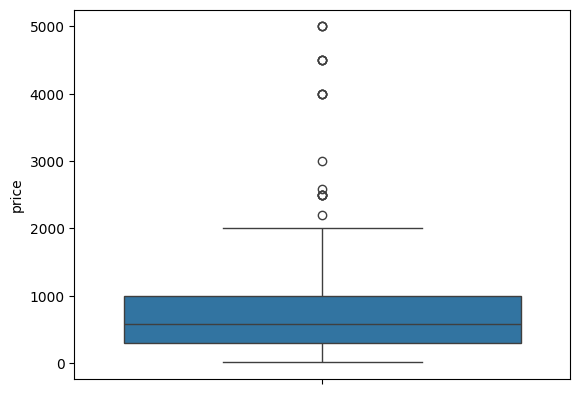

In [ ]:
sns.boxplot(data['price'])

<Axes: ylabel='views_cnt'>

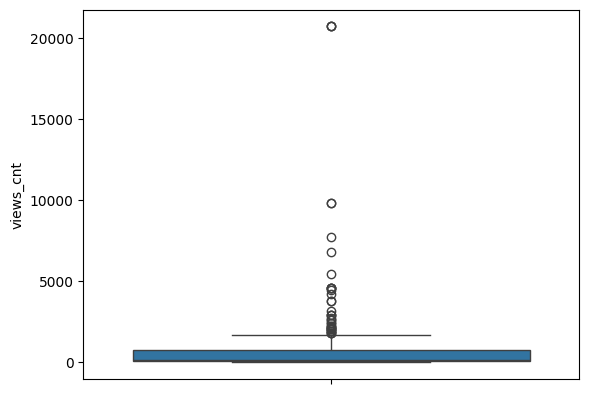

In [ ]:
sns.boxplot(data['views_cnt'])

Убираем выбросы, такие как: число просмотров > 5000 и цена товара >2000

In [ ]:
data = data[(data['average_income'] != 0) & (data['price'] <= 2000) & (data['views_cnt'] <= 5000)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 366
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            335 non-null    object 
 1   price           335 non-null    float64
 2   url             335 non-null    object 
 3   views_cnt       335 non-null    int64  
 4   city            335 non-null    object 
 5   seller          335 non-null    object 
 6   seller_rating   0 non-null      float64
 7   comments_cnt    335 non-null    int64  
 8   average_income  335 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 26.2+ KB


Для построения расчетной регрессионной функции, будем применять линейную регрессию

In [ ]:
model = LinearRegression()

In [ ]:
X = data[['price', 'average_income', 'comments_cnt']]
y = data['views_cnt']

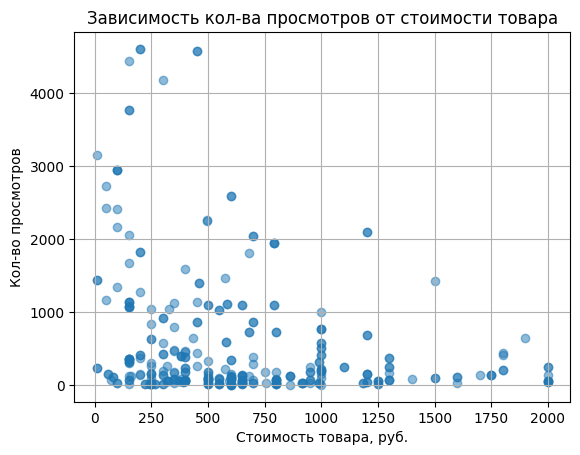

In [ ]:
plt.scatter(X['price'], y, alpha = 0.5)
plt.grid()
plt.xlabel('Стоимость товара, руб.')
plt.ylabel('Кол-во просмотров')
plt.title('Зависимость кол-ва просмотров от стоимости товара')
plt.show()

Построим расчетную прямую спроса только по 1 критерию: цена

In [ ]:
X_price = data[['price']]

In [ ]:
model.fit(X_price, y)

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([-0.4681874]), np.float64(834.1598660433428))

Получает следующую зависимость
Q = 834.16 - 0.46 * P
Построим график и посомтрим на функцию

In [ ]:
sorted_idx = X['price'].argsort()
X_sorted = X.iloc[sorted_idx]
y_pred = model.predict(X[['price']])
y_sorted_pred = y_pred[sorted_idx]
print('R2 score: ', r2_score(y, y_pred))
print('MAE: ', mean_absolute_error(y, y_pred))

R2 score:  0.06057253340845814
MAE:  572.4882473421003


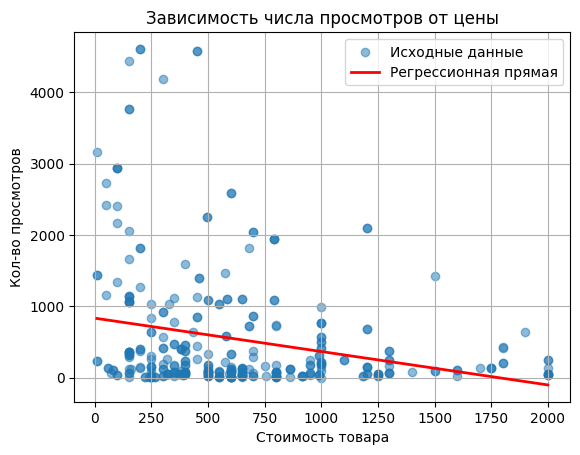

In [ ]:
plt.scatter(X['price'], y, alpha = 0.5, label = 'Исходные данные')
plt.plot(X_sorted['price'], y_sorted_pred, color = 'red', linewidth=2, label = 'Регрессионная прямая')
plt.xlabel('Стоимость товара')
plt.ylabel('Кол-во просмотров')
plt.title('Зависимость числа просмотров от цены')
plt.grid()
plt.legend()
plt.show()

Добавим остальные параметры в наш алгоритм и найдем оставшиеся переменные

In [ ]:
model.fit(X, y)
y_pred = model.predict(X)
print('r2 score: ', r2_score(y, y_pred))
print("mae: ", mean_absolute_error(y, y_pred))

r2 score:  0.07344815479536693
mae:  562.2756374774466


In [ ]:
model.coef_, model.intercept_

(array([-0.3893681 , -0.00215213,  0.54592668]), np.float64(966.6423802520779))

Таким образом, наша функция имеет следующий вид: **Q** = 966,642 - 0.389**P** - 0.002**I** + 0.546**A**

In [ ]:
X['price'].mean(), X['average_income'].mean(), X['comments_cnt'].mean()

(np.float64(639.5611940298508),
 np.float64(97274.1104477612),
 np.float64(48.45671641791045))

Расчитаем по нашим данным эластичность спроса по ценовым и неценовым факторам
формула для расчета:

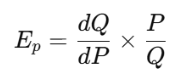

In [ ]:
Ep = -0.389*X['price'].mean()/y.mean()
Ei = -0.002*X['average_income'].mean()/y.mean()
Ea = 0.546*X['comments_cnt'].mean()/y.mean()

In [ ]:
print(f'Эластичность спроса по цене: {round(Ep, 2)}')
print(f'Эластичность спроса по доходу: {round(Ei,2)}')
print(f'Эластичность спроса по количеству комментариев: {round(Ea,2)}')

Эластичность спроса по цене: -0.47
Эластичность спроса по доходу: -0.36
Эластичность спроса по количеству комментариев: 0.05


**Выводы**

В ходе анализа была выявлена зависимость спроса (в нашем случае — числа просмотров объявлений) от следующих факторов: цена товара, средний доход потребителей (средняя зарплата по региону) и бюджет на рекламу (в качестве данного параметра использовано количество комментариев у продавца).

Для решения задачи применена линейная модель, по результатам которой получено следующее уравнение зависимости:


Q=966.642−0.389P−0.002I+0.546A


Где:

Q — спрос (количество просмотров),

P — цена товара,

I — средний доход потребителей,

A — бюджет на рекламу (количество комментариев).

Исходя из полученной модели, можно сделать следующие выводы:

**1. Зависимость спроса от цены**

Спрос и цена находятся в обратной зависимости: при увеличении цены спрос снижается, что является ожидаемым результатом. Однако расчет коэффициента эластичности спроса по цене показал, что влияние цены на спрос невелико. В частности, при снижении цены на 1% спрос увеличится лишь на 0.47%.

**2. Зависимость спроса от дохода потребителей**

Интересная закономерность наблюдается в отношении среднего дохода: с его ростом спрос на товар снижается. Это можно объяснить тем, что при увеличении доходов потребители переходят в более премиальный сегмент украшений.

**3. Влияние рекламы на спрос**

В отличие от цены и дохода, зависимость спроса от рекламы является прямой и имеет наибольший коэффициент среди всех факторов. Это говорит о том, что в данном сегменте (украшения в этно-стиле) целесообразнее увеличивать бюджет на продвижение, а не снижать цену, особенно если текущая цена находится в среднем диапазоне относительно конкурентов.



